In [255]:
import pandas as pd
from datetime import date, datetime

In [256]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1kmpq_cb7uX8hNI-q77y6Z16yeGdKvwU4hGr4F62rVbw/edit#gid=0"
spreadsheet_csv_url = spreadsheet_url.replace("/edit#gid=", "/export?format=csv&gid=")

In [257]:
responses_df = pd.read_csv("ramp-up-responses.csv")

In [258]:
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 33 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Marca temporal                                                                                           9 non-null      object 
 1   Puntuación                                                                                               9 non-null      object 
 2   1. Si A = 1, B = 1, C = 2, entonces D = A == (B,) or not (not C == B)                                    8 non-null      object 
 3   2. ¿Qué variable está mal declarada?                                                                     9 non-null      object 
 4   3. ¿Qué código usa la mejor práctica para declarar una variable?                          

In [259]:
d = datetime(2022, 5, 14, 14, 30)

def datetime_str_to_dt(datetime_str):
    datetime_dt = datetime.strptime(datetime_str, "%d/%m/%Y %H:%M:%S") 
    return datetime_dt   

min_dt = datetime_str_to_dt(
    responses_df["Marca temporal"].min())
max_dt = datetime_str_to_dt(
    responses_df["Marca temporal"].max())

delta = (min_dt - max_dt)
max_diff_hours = round(
    (delta.total_seconds() / 3600), 2)

diff_dt = max_dt - min_dt

In [260]:
print(
    """La primera entrega ha sido {0}, 
    {1} horas despues de la publicacion.""".format(min_dt, min_dt - d))
print(
    """La utima entrega ha sido {0}, 
    {1} horas despues de la publicacion.""".format(max_dt, (max_dt - d)) \
        .replace("day", "dia"))
print("La primera y ultima entrega se llevan {0}.".format(diff_dt) \
        .replace("day", "dia"))    

La primera entrega ha sido 2022-05-14 21:39:30, 
    7:09:30 horas despues de la publicacion.
La utima entrega ha sido 2022-05-16 20:47:06, 
    2 dias, 6:17:06 horas despues de la publicacion.
La primera y ultima entrega se llevan 1 dia, 23:07:36.


In [261]:
def get_score_str(score):
    if score >= 5 and score < 6:
        score_str = "SUFICIENTE" 
    elif score >= 6 and score < 7:
        score_str = "BIEN"         
    elif score >= 7 and score < 9:
        score_str = "NOTABLE" 
    elif score >= 9 and score <= 10:
        score_str = "SOBRESALIENTE"
    else:
        score_str = "SUSPENSO"
    return score_str    

total_points = int(responses_df["Puntuación"].str.split(" / ").min()[1])
min_points = int(responses_df["Puntuación"].str.split(" / ").min()[0])
max_points = int(responses_df["Puntuación"].str.split(" / ").max()[0])

min_score = round(min_points / total_points * 10, 2)
max_score = round(max_points / total_points * 10, 2)

max_diff_score = round(max_score - min_score, 2)

median_points = int(responses_df["Puntuación"].str.split(" / ").str[0].astype('int32').median())
mean_points = int(responses_df["Puntuación"].str.split(" / ").str[0].astype('int32').mean())
std_points = int(responses_df["Puntuación"].str.split(" / ").str[0].astype('int32').std())

median_score = round(median_points / total_points * 10, 2)
mean_score = round(mean_points / total_points * 10, 2)
std_score = round(std_points / total_points * 10, 2)

In [262]:
print("La nota minima ha sido {0}, lo que equivale a un {1}".format(min_score, get_score_str(min_score)))
print("La nota minima ha sido {0}, lo que equivale a un {1}".format(max_score, get_score_str(max_score)))
print("La media de la nota ha sido {0}, lo que equivale a un {1}".format(mean_score, get_score_str(mean_score)))
print("La mediana de la nota ha sido {0}, lo que equivale a un {1}".format(median_score, get_score_str(median_score)))
print("La mediana de la nota ha sido {0}.".format(std_score))
print("La maxima diferencia entre notas ha sido: {}.".format(max_diff_score))

La nota minima ha sido 5.67, lo que equivale a un SUFICIENTE
La nota minima ha sido 10.0, lo que equivale a un SOBRESALIENTE
La media de la nota ha sido 7.67, lo que equivale a un NOTABLE
La mediana de la nota ha sido 7.67, lo que equivale a un NOTABLE
La mediana de la nota ha sido 1.33.
La maxima diferencia entre notas ha sido: 4.33.


In [264]:
responses_df["score"] = round( \
    (responses_df["Puntuación"].str.split(" / ").str[0].astype('int32') \
    / responses_df["Puntuación"].str.split(" / ").str[1].astype('int32')) * 10, 2)
responses_df["score_str"] = responses_df["score"].apply(get_score_str)


Text(0, 0.5, 'Numero de notas')

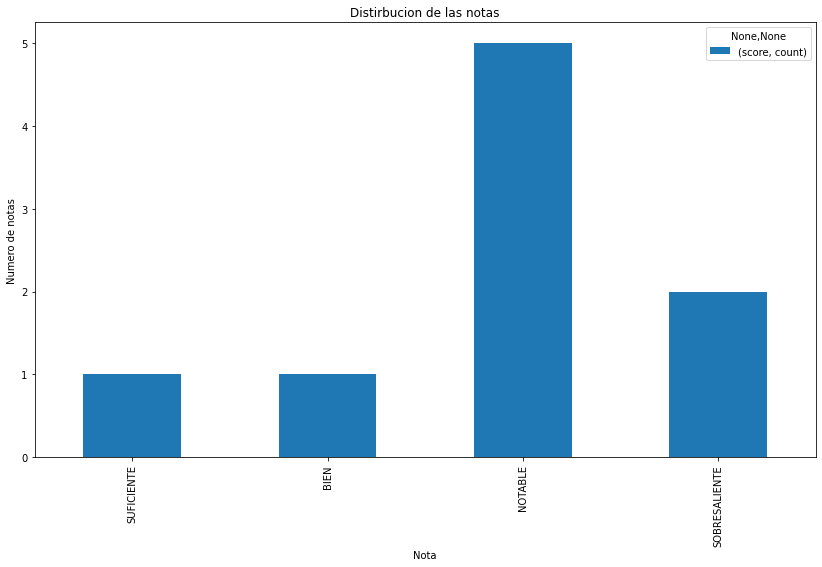

In [265]:
order = ['SUFICIENTE', 'BIEN', 'NOTABLE','SOBRESALIENTE']
responses_agg_df = responses_df[["score","score_str"]] \
    .groupby(['score_str']).agg({'count'})
ax = responses_agg_df.loc[order].plot(
    kind = 'bar', figsize = (14, 8),
    title = "Distirbucion de las notas")
ax.set_xlabel("Nota")
ax.set_ylabel("Numero de notas")

In [266]:
vowels = ('a', 'e', 'i', 'o', 'u')

def stringify_nums(num):
    if num < 0:
        _str = "NO hay ningun"
        plural = False
    elif num == 1:
        _str = "SOLO hay {}".format(num)
        plural = False
    else:
        _str = "Hay {}".format(num)
        plural = True       
    return _str, plural        

perfect_exam = \
    responses_df["Puntuación"].str.split(" / ").str[0].astype('int32') \
        == responses_df["Puntuación"].str.split(" / ").str[1].astype('int32')
perfect_exam_df = responses_df[perfect_exam]
start_str, plural = stringify_nums(len(perfect_exam_df))
end_str_lst = ["examen", "perfecto"]
if plural:
    end_str = " ".join([e + "s" if e.endswith(vowels) else e + "es" for e in end_str_lst])
else:
    end_str = " ".join(e for e in end_str_lst)
print("{0} {1}.".format(start_str, end_str.upper()))

SOLO hay 1 EXAMEN PERFECTO.


In [267]:
#comparison_df = responses_df["Marca temporal"].div(perfect_exam_df)
failed_questions_dict = {}

for column in responses_df.columns:
    if column[0].isdigit():
        #print(column)
        perc_lst = list(responses_df[column].value_counts(normalize = False))
        if len(perc_lst) > 1:
            perc_dict = responses_df[column].value_counts(normalize = False).to_dict()
            #print()
            #print(perfect_exam_df[column])
            failed_questions_dict[column] = perc_dict
#responses_df["Marca temporal"].value_counts(normalize = True)

In [268]:
print(len(failed_questions_dict))

25


In [269]:
def print_responses(_dict, num_responses):
    for question, response in _dict.items():
        if len(response) == num_responses:
            true_resp = perfect_exam_df[question].values
            print(question)
            resp_dict = {k:  str(v) + " <-- Esta es la respuesta buena" if k == true_resp else v for k, v in response.items()}
            for k, v in resp_dict.items():
                print("    {0}: {1}".format(k, v)) 

#len(failed_questions_dict["2. ¿Qué variable está mal declarada?"])

In [270]:
print_responses(failed_questions_dict, 4)

23. ¿Qué for puedo usar para recorrer por valor del elemento de una lista o tupla?
    for i in lista:: 5 <-- Esta es la respuesta buena
    for i, x in lista:: 2
    for i in enumerate(lista):, for i in lista:: 1
    for i in range(lista): 1


In [271]:
print_responses(failed_questions_dict, 3)

6. Para añadir un elemento a una lista utilizo:
    lista.append(elemento): 7 <-- Esta es la respuesta buena
    lista.add(elemento): 1
    lista.add(elemento), lista.append(elemento): 1
8. Para iterar sobre el string "thebridge":
    for i in "thebridge":: 6 <-- Esta es la respuesta buena
    for i in enumerate("thebridge"):: 2
    for i in "thebridge":, for i in enumerate("thebridge"):: 1
9. Si paso de un diccionario a una lista, mediante la sentencia list(mi_diccionario)...
    tendre una lista de claves: 6 <-- Esta es la respuesta buena
    tendre una lista de tuplas con las claves y valores: 2
    tendre una lista de tuplas con las claves y valores, tendre una lista de claves, tendre una lista de valores: 1
10. Si hago un "for i in mi_diccionario", voy a iterar sobre:
    Las claves: 6 <-- Esta es la respuesta buena
    Dará error: 2
    Claves y valores: 1
17. Si quiero concatenar los elementos de dos tuplas...
    tupla1 + tupla2: 6 <-- Esta es la respuesta buena
    tupla_1.con

In [272]:
print_responses(failed_questions_dict, 2)

1. Si A = 1, B = 1, C = 2, entonces D = A == (B,) or not (not C == B)
    Es correcto y D = True: 5
    Es correcto y D = False: 3 <-- Esta es la respuesta buena
2. ¿Qué variable está mal declarada?
    var = false: 7 <-- Esta es la respuesta buena
    Ninguna, son todas válidas: 2
5. float("67,98") da
    Error: 6 <-- Esta es la respuesta buena
    un float que vale 67.98: 3
11. ¿Y si ejecuto mi_lista[len(mi_lista)]?
    Error: 7 <-- Esta es la respuesta buena
    No se puede usar ahi el len: 2
12. ¿Qué lista esta declarada de manera incorrecta?
    Ninguna, todas son correctas: 8 <-- Esta es la respuesta buena
    lista = ["eeee", 3, 4, [], [3,4,5,[]]]: 1
13. Si tengo una clave de un diccionario y quiero acceder a su valor... ¿Cómo procedo?
    diccionario[key]: 7 <-- Esta es la respuesta buena
    diccionario.keys(): 2
14. Los elementos de un set son únicos
    True: 8 <-- Esta es la respuesta buena
    False: 1
15. Las tuplas son inmutables y desordenadas
    False: 7 <-- Esta es l